# Solving with a Machine Learning Approach

In [1]:
# installing MLmetrics library, if not yet available
if (!("MLmetrics" %in% rownames(installed.packages()))) {
    install.packages("MLmetrics")
}

MLmetrics is a collection of evaluation metrics : https://github.com/yanyachen/MLmetrics

We collect the Boston dataset from the MASS library. Sampling the indexes of the training and test sets allows separating the data and shuffling it at the same time.

In [2]:
library(MASS)
library(MLmetrics )

y <- Boston$medv
X <- as.data.frame(scale(Boston[,-dim(Boston)[2]]))

# Splitting the data frame into train and test sets
set.seed(42)
sample_size <- floor(0.8 * nrow(X))
train_idx <- sample(seq_len(nrow(X)), size = sample_size)

X_train <- X[train_idx,]
y_train <- y[train_idx]
X_test  <- X[-train_idx,]
y_test  <- y[-train_idx]


Attaching package: 'MLmetrics'


The following object is masked from 'package:base':

    Recall




A linear regression can be made using the lm command. You express the formula as y ~ X and as for as the predictors you can use the fulls stop to indicate that you want to use them all. The parameter data in this case points out to all the predictors.

Using the summary command on the linear regression model you can obtain informations on the coefficients (with some statistical test) and the Multiple R-squared on the training data.

In [3]:
model <- lm(y_train ~ ., data=X_train)
summary(model)


Call:
lm(formula = y_train ~ ., data = X_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.4221  -2.7174  -0.5463   1.5167  25.7788 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 22.5180340  0.2373082  94.889  < 2e-16 ***
crim        -1.0160865  0.2902853  -3.500 0.000518 ***
zn           0.8238446  0.3729610   2.209 0.027760 *  
indus       -0.0006126  0.4726326  -0.001 0.998966    
chas         0.4940737  0.2533316   1.950 0.051856 .  
nox         -1.9873529  0.4934101  -4.028 6.77e-05 ***
rm           2.4883216  0.3191494   7.797 5.85e-14 ***
age         -0.0919388  0.4156636  -0.221 0.825064    
dis         -3.0142793  0.4833878  -6.236 1.17e-09 ***
rad          2.6393915  0.6457811   4.087 5.30e-05 ***
tax         -1.8776975  0.7123308  -2.636 0.008724 ** 
ptratio     -2.1300916  0.3209767  -6.636 1.08e-10 ***
black        0.7524355  0.2808059   2.680 0.007684 ** 
lstat       -3.7906187  0.3937595  -9.627  < 2e-16 ***
---
Sig

## Understanding R Squared

R2_Score is the command from MLmetrics that computes the coefficient of determination.

In [4]:
# Train R2
R2_Score(y_pred=model$fitted.values, y_true=y_train)

[1] 0.7260455

In [5]:
# Test R2
R2_Score(y_pred=predict(model, X_test), y_true=y_test)

[1] 0.7767461

The attribute coefficients in your linear regression model specifically contains the regression coefficients.

In [6]:
# Printing linear regression coefficients
print(model$coefficients)

 (Intercept)         crim           zn        indus         chas          nox 
22.518033996 -1.016086468  0.823844630 -0.000612643  0.494073726 -1.987352913 
          rm          age          dis          rad          tax      ptratio 
 2.488321619 -0.091938832 -3.014279284  2.639391489 -1.877697488 -2.130091580 
       black        lstat 
 0.752435546 -3.790618674 


## Mixing Variables of Different Types

If you want to compute interactions for your model, you just have to ^2 your coefficient. If you use .^2 you imply a model with all the variables and their second degree interactions (i.e. power+noise+power\*noise). In the same way you can obtain even interactions of higher level (i.e. .^3 or .^4).

In [7]:
model <- lm(y_train ~ .^2, data=X_train)
summary(model)


Call:
lm(formula = y_train ~ .^2, data = X_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.1826 -1.6348 -0.1756  1.4451 16.8911 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    34.09464    7.69895   4.428 1.31e-05 ***
crim           34.39026   19.10376   1.800 0.072798 .  
zn             28.45051   17.06093   1.668 0.096402 .  
indus          -1.14870   12.10215  -0.095 0.924442    
chas            1.39927    0.59310   2.359 0.018929 *  
nox            -2.05182    0.82987  -2.472 0.013951 *  
rm              3.87065    0.33363  11.602  < 2e-16 ***
age            -2.33473    0.51152  -4.564 7.22e-06 ***
dis            -4.09742    0.90003  -4.553 7.61e-06 ***
rad           -21.02338   20.07325  -1.047 0.295757    
tax            20.01410   28.60861   0.700 0.484709    
ptratio         5.06309    3.08021   1.644 0.101235    
black           2.33395    0.94912   2.459 0.014473 *  
lstat          -2.91265    0.48388  -6.019 4.91e-09 ***


In [8]:
# Train R2
R2_Score(y_pred=model$fitted.values, y_true=y_train)

[1] 0.9124725

In [9]:
# Test R2
R2_Score(y_pred=predict(model, X_test), y_true=y_test)

[1] 0.9230921

# Switching to Probabilities

In [10]:
y_train_lr <- y_train >= 35
y_test_lr  <- y_test >= 35

If you want a logistic regression, not only your target should be a factor, but you have to use the glm function with the family parameter set to binomial(link="logit"). There are no other differences from linear regression.

In [11]:
lr_model <- glm(y_train_lr ~ ., data=X_train, family=binomial(link="logit"))
summary(lr_model)


Call:
glm(formula = y_train_lr ~ ., family = binomial(link = "logit"), 
    data = X_train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.93597  -0.11311  -0.02046  -0.00305   2.79536  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.48096    1.36412  -5.484 4.16e-08 ***
crim         0.51510    0.46663   1.104   0.2697    
zn          -0.02774    0.33596  -0.083   0.9342    
indus       -0.10544    0.69727  -0.151   0.8798    
chas        -0.12131    0.26285  -0.462   0.6444    
nox         -0.61587    0.91744  -0.671   0.5020    
rm           0.96487    0.37732   2.557   0.0106 *  
age          0.47733    0.59735   0.799   0.4242    
dis         -0.76247    0.65630  -1.162   0.2453    
rad          2.99503    1.27302   2.353   0.0186 *  
tax         -2.03824    1.20462  -1.692   0.0906 .  
ptratio     -0.93921    0.45413  -2.068   0.0386 *  
black        0.58575    1.37814   0.425   0.6708    
lstat       -5.00995    1.

Note: you don't have R squared anymore because it doesn't make sense in the logistic regression. You have instead to use other measures such as accuracy.

In [12]:
# Train Accuracy
proba <- predict(lr_model, X_train, type='response')
preds <- ifelse(proba>0.5, 1, 0)
Accuracy(y_pred=preds, y_true=y_train_lr)

[1] 0.9529703

In [13]:
# Test Accuracy
proba <- predict(lr_model, X_test, type='response')
preds <- ifelse(proba>0.5, 1, 0)
Accuracy(y_pred=preds, y_true=y_test_lr)

[1] 0.9705882

## Defining the outcome of features that don’t work together

In the following example you repeat the same linear regression model multiple times, each time adding some extra random noise to both the train and test sets. The more noise you had, the better the trianing fit but the worse the prediciton performances. The same happens also in the real world as you had more features to your model. Always test if they are really adding value or just noise by testing on a validation set (testing on the test set will equate to snooping, something that won't work as much well in the future).

In [14]:
r2_train = NULL
r2_test = NULL

for (i in 1:128) {
    
    train_rand <- as.data.frame(matrix(runif(nrow(X_train)*i), nrow(X_train), i))
    test_rand <- as.data.frame(matrix(runif(nrow(X_test)*i), nrow(X_test), i))
    
    X_train_rand <- cbind(X_train, train_rand)
    X_test_rand <- cbind(X_test, test_rand)
    
    model <- lm(y_train ~ ., data=X_train_rand)
    
    # Train R2
    r2_train <- c(r2_train, R2_Score(y_pred=model$fitted.values, y_true=y_train))
    
    # Test R2
    r2_test <- c(r2_test, R2_Score(y_pred=predict(model, X_test_rand), y_true=y_test))
    
}

By plotting you can see the training fit (the coefficient of determination) increase ...

... as the predictive power on test set decreases

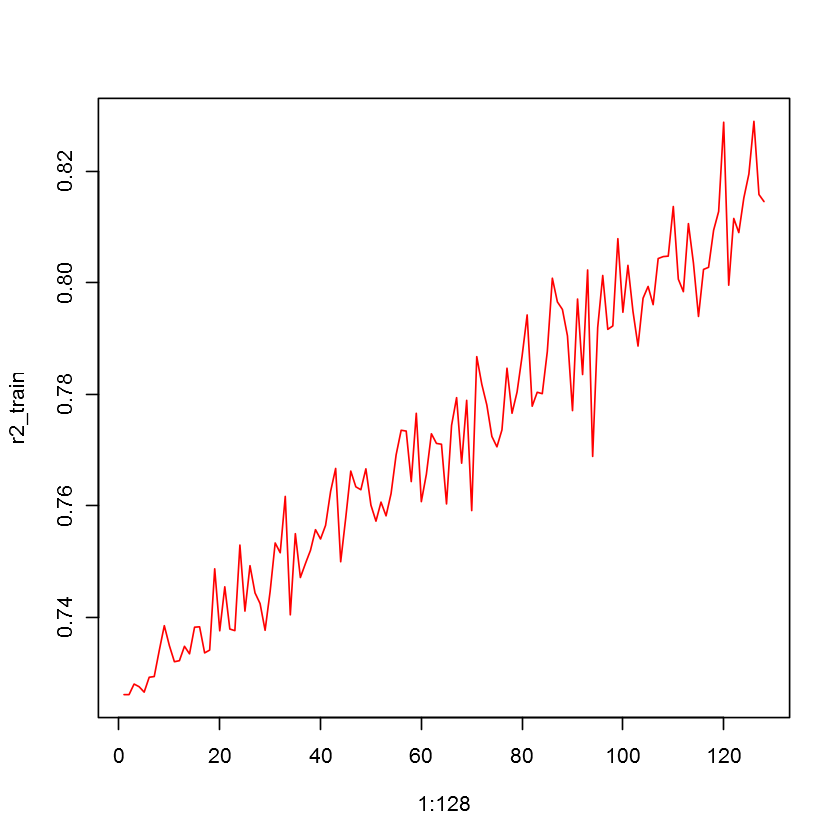

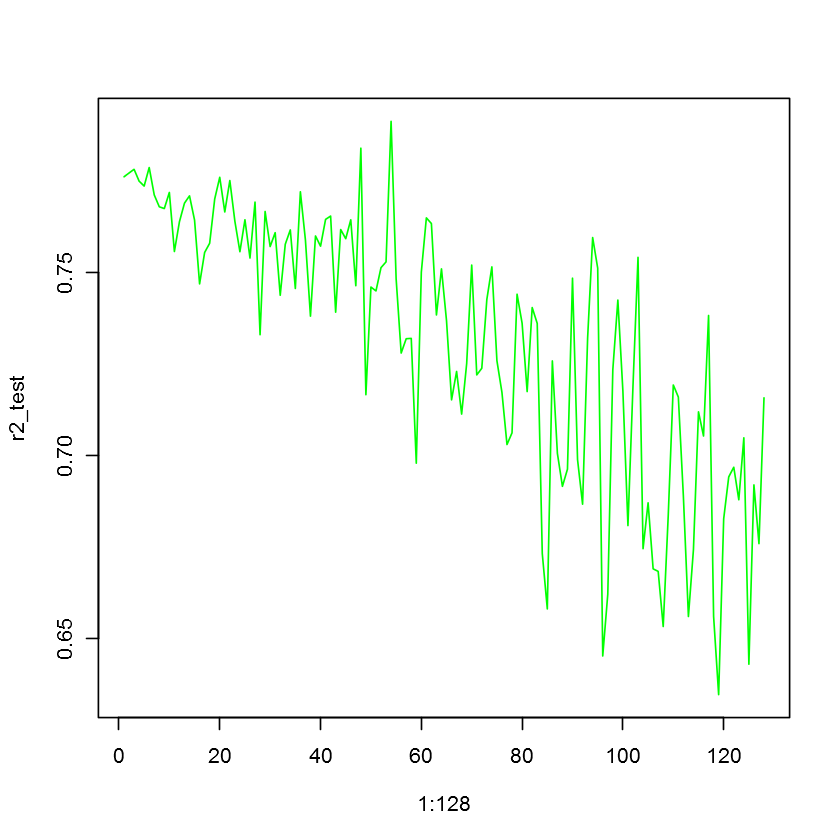

In [15]:
plot(1:128, r2_train, type="l", col="red")
plot(1:128, r2_test, type="l", col="green")

## Solving overfitting by using greedy selection

In [16]:
# installing caret library, if not yet available
if (!("caret" %in% rownames(installed.packages()))) {
    install.packages("caret")
}

model.matrix allows us to create a polynomial expansion and record it into a matrix. We convert the matrix to a data.frame and we care to change some of its feature labels that could be incompatible with linear models. Now we can reuse it for multiple models. 

In [17]:
polyX <- as.data.frame(model.matrix(y_train ~ .^2, data=X_train))
polyX_test <- as.data.frame(model.matrix(y_test ~ .^2, data=X_test))
colnames(polyX) = gsub(":", "_", colnames(polyX))
colnames(polyX_test) = colnames(polyX)

rfe, based on R squared and repeated cross validation (it is ten fold cv repeated 5 times with different partition seeds), will try to remove as many uninfluential variables as possible.

In [18]:
library(caret)

lmProfile <- rfe(polyX, y_train,
                 sizes=c(1:92),
                 metric="Rsquared", maximize=TRUE, 
                 rfeControl = rfeControl(functions=lmFuncs,
                                         method="repeatedcv",
                                         number=5)
                )

Loading required package: lattice

Loading required package: ggplot2


Attaching package: 'caret'


The following objects are masked from 'package:MLmetrics':

    MAE, RMSE


Warning message in predict.lm(object, x):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, x):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, x):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, x):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, x):
"prediction from a rank-deficient fit may be misleading"


by printing the rfe model you will have a complete report of how the model performs with everytime the most unuseful feature removed. By looking for the max cross-validated R squared you can get the best feature subset for your model.

In [19]:
lmProfile


Recursive feature selection

Outer resampling method: Cross-Validated (5 fold, repeated 1 times) 

Resampling performance over subset size:

 Variables  RMSE Rsquared   MAE RMSESD RsquaredSD  MAESD Selected
         1 8.762  0.03473 6.396 0.8564    0.02659 0.5426         
         2 8.230  0.16041 5.889 0.8764    0.04379 0.5189         
         3 7.879  0.23914 5.606 1.0567    0.08049 0.6340         
         4 7.391  0.31376 5.174 0.7657    0.02087 0.4699         
         5 7.269  0.33639 5.090 0.7319    0.03498 0.3936         
         6 7.375  0.31616 5.166 0.6002    0.04731 0.3046         
         7 7.398  0.31314 5.192 0.6155    0.04657 0.3380         
         8 7.119  0.36433 4.974 0.7120    0.08756 0.4416         
         9 7.027  0.37979 4.875 0.7951    0.07760 0.4952         
        10 7.018  0.38186 4.826 0.7762    0.07164 0.5187         
        11 6.979  0.39621 4.848 0.9002    0.10066 0.5796         
        12 6.908  0.40476 4.767 0.7627    0.07910 0.6796         


You can print the best subset using the attribute optVariables.

In [20]:
cat("Best subset:", lmProfile$optVariables)

Best subset: crim_tax crim_rad crim_zn tax crim rad crim_indus zn crim_ptratio indus crim_dis indus_rad crim_chas dis tax_black ptratio rm age_rad rad_black rm_tax age_black nox_age rad_tax lstat tax_ptratio black rad_lstat age dis_lstat tax_lstat crim_lstat zn_lstat zn_tax crim_age dis_black indus_nox chas_tax dis_rad nox age_lstat indus_black nox_lstat indus_rm nox_ptratio nox_dis zn_rad indus_dis crim_rm rad_ptratio age_tax age_dis chas_rad chas rm_lstat rm_age rm_rad zn_black crim_nox chas_dis zn_nox zn_indus dis_tax chas_black ptratio_black chas_rm

Please notive that the result is very good (interactions are important) and it is similar both in the train and in the test sets, which implies that the model is robust to noise and it should perfom very well in future predictions.

In [21]:
# Train R2
R2_Score(y_pred=predict(lmProfile, polyX), y_true=y_train)

[1] 0.9046207

In [22]:
# Test R2
R2_Score(y_pred=predict(lmProfile, polyX_test), y_true=y_test)

[1] 0.9006891

## Addressing Overfitting by Regularization

glmnet is a library prepared by, among the others, Jerome Friedman, Trevor Hastie and Rob Tibshirani, professors of statistics at Stanford University who are prominent researchers in the field of regularization. By setting a simple parameter, alpha from 0 to 1, you can switch from ridge to lasso regularization, or blend them by an intermediate value (i.e. 0.5 will blend lasso and ridge).  

In [23]:
# installing rpart library, if not yet available
if (!("glmnet" %in% rownames(installed.packages()))) {
    install.packages("glmnet")
}

In [24]:
polyX <- as.data.frame(model.matrix(y_train ~ .^2, data=X_train))
polyX_test <- as.data.frame(model.matrix(y_test ~ .^2, data=X_test))
colnames(polyX) = gsub(":", "_", colnames(polyX))
colnames(polyX_test) = colnames(polyX)

We test a sequence of lambdas using corss validation. The best fitting is retained as the solution.

In [25]:
library(glmnet)

lambdas <- 10^seq(3, -2, by=-.1)
cv_fit <- cv.glmnet(as.matrix(polyX), y_train, alpha=0, lambda=lambdas)

Loading required package: Matrix

Loaded glmnet 4.0-2



Here is the graph of the cross-validation of lambdas. Each level of abscissa is a lambda and the spread you have plotted is the cv variance. The bestr lambdas lies at the minimum.

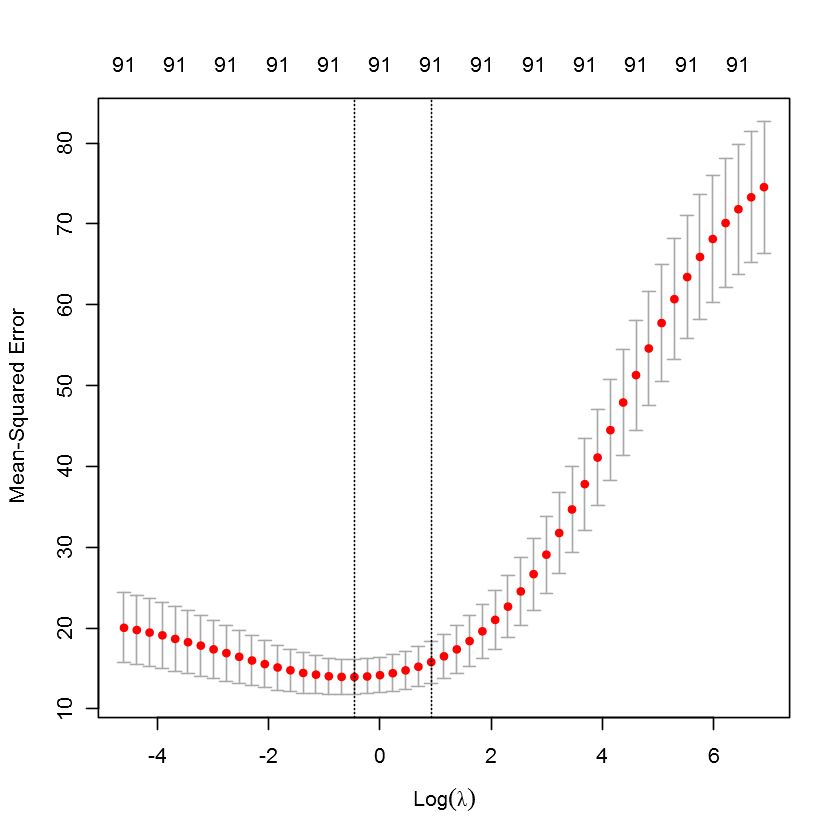

In [26]:
plot(cv_fit)

In [27]:
opt_lambda <- cv_fit$lambda.min
opt_lambda

[1] 0.6309573

In [28]:
# Train R2
R2_Score(y_pred=predict(cv_fit$glmnet.fit, s=opt_lambda, newx=as.matrix(polyX)), y_true=y_train)

[1] 0.8859208

In [29]:
# Test R2
R2_Score(y_pred=predict(cv_fit$glmnet.fit, s=opt_lambda, newx=as.matrix(polyX_test)), y_true=y_test)

[1] 0.9201641

After testing ridge, we try the lasso (alpha=1).

In [30]:
library(glmnet)

lambdas <- 10^seq(3, -2, by=-.1)
cv_fit <- cv.glmnet(as.matrix(polyX), y_train, alpha=1, lambda=lambdas)

Also in this graph, please look for the minimum.

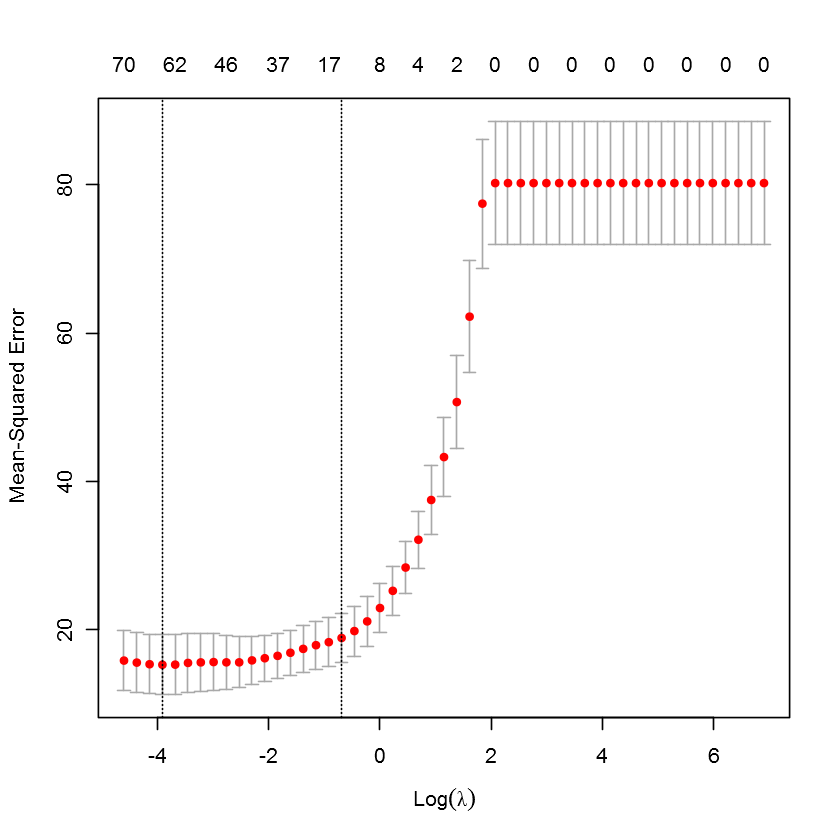

In [31]:
plot(cv_fit)

In [32]:
opt_lambda <- cv_fit$lambda.min
opt_lambda

[1] 0.01995262

In [33]:
# Train R2
R2_Score(y_pred=predict(cv_fit$glmnet.fit, s=opt_lambda, newx=as.matrix(polyX)), y_true=y_train)

[1] 0.9017904

In [34]:
# Test R2
R2_Score(y_pred=predict(cv_fit$glmnet.fit, s=opt_lambda, newx=as.matrix(polyX_test)), y_true=y_test)

[1] 0.9333671

# Understanding SGD is different

In [35]:
# installing gradDescent library, if not yet available
if (!("gradDescent" %in% rownames(installed.packages()))) {
    install.packages("gradDescent")
}

gradDescent (https://cran.r-project.org/web/packages/gradDescent/index.html) is a collection of gradient descent methods, allowing us to replicate the same functions available in Python.

In [36]:
dataTrain <- cbind(X_train, y_train)
dataTest <- cbind(X_test, y_test)

using gradDescentR.learn we have to feed data combine as a matrix containing first all the Xs and as last column out y. We can explicit if we need scaling (featureScaling=TRUE) and controlling learning parameters such as alpha or the maximum iteration.

In [37]:
library(gradDescent)


sgd <- gradDescentR.learn(dataTrain, featureScaling=TRUE, scalingMethod="VARIANCE",
                          learningMethod="SGD", control=list("alpha"=0.001, "maxIter"=100000), seed = 0)


Attaching package: 'gradDescent'


The following object is masked from 'package:caret':

    RMSE


The following object is masked from 'package:MLmetrics':

    RMSE




The resulting model is lacking the same verbosity of standard linear models. We can only get the coefficients out.

In [38]:
sgd$model

0.01059537,-0.1119627,0.1025478,0.01043503,0.05412569,-0.2116884,0.2936119,-0.01675016,-0.3354501,0.2918776,-0.2018684,-0.230332,0.08096517,-0.3959308


Yet, we can use it to predict on a new test set. Please notice that it has to resemble the training data, so you need a last columns as the target. Since often you simply don't know it (after all you are asking for a prediction), you just fill it with zeros.

In [39]:
train_preds <- predict(sgd, cbind(X_train, rep(0, nrow(X_train))))$V1
test_preds <- predict(sgd, cbind(X_test, rep(0, nrow(X_test))))$V1

In [40]:
# Train R2
R2_Score(y_pred=train_preds, y_true=y_train)

[1] 0.7245797

In [41]:
# Test R2
R2_Score(y_pred=test_preds, y_true=y_test)

[1] 0.77627